# Влияние Redbull на частоту сердечных сокращений

### Описание проекта

<p></p>
Предоставлены результаты исследования влияния энергетического напитка на сердечно-сосудистую систему волонетров.<br>  
  
<b>Задача:</b> исследовать степень влияния напитка на сердце в зависимости от различных параметров(пол, возраст).<br>

<b>Цели:</b>
- ознакомиться с данными и выполнить их предобработку
- провести исследовательский анализ данных, изучив данные (их значения, распределение, разницу)
- провести А/В тест, сравнив группу женщин и мужчин
- провести А/В тест, выявляя влияние напитка на представителей каждого пола отдельно
- провести А/В тест, сравнив волонтеров в разрезе возрастных категорий
- сделать общий вывод


### Описание данных: 

<p></p>
<div style="border:solid black 1px; padding: 20px">
Предоставлены данные исследования.<br> 
В нем приняло участие 120 волонтеров, мужчины и женщины. В возрасте от 30 лет и старше. В таблице представлена частота сердечных сокращений людей до того, как они приняли напиток, и после. Группы поделены поровну: 60 мужчин, 60 женщин; по 40 человек в каждой возрастной категории(по 20 каждого пола).<br>
    </div>

## Импорт данных и предобработка

In [1]:
# импорт библиотек 
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
import datetime as dt
from scipy import stats as st
import math as mth
import warnings

In [2]:
# отключить предупреждения
warnings.filterwarnings('ignore')

In [3]:
# чтение csv-файла
df =  pd.read_csv('/Users/janeure/Desktop/pet project/Redbull.csv')
df = df. loc [:, ~df. columns.str.contains('^Unnamed')]

In [4]:
# функция для знакомства с данными
def get_info(df, n):
    return (
            df.info(),
            display(df.head(n)),
            display(df.duplicated().sum()),
            )


# вывод основной информации visits
display(get_info(df, 5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Volunteer_ID  120 non-null    int64 
 1   sex           120 non-null    object
 2   agegrp        120 non-null    object
 3   bp_before     120 non-null    int64 
 4   bp_after      120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


,Volunteer_ID,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,168
4,5,Male,30-45,146,161


0

(None, None, None)

*Пропусков в столбцах и явных дубликатов нет, но следует изменить название колонки.*

In [5]:
# функция переименования названий колонок
def change_name(df):
    df.columns = [x.lower() for x in df.columns]
    return df.info()

change_name(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   volunteer_id  120 non-null    int64 
 1   sex           120 non-null    object
 2   agegrp        120 non-null    object
 3   bp_before     120 non-null    int64 
 4   bp_after      120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [6]:
# проверка групп на пересечение
len(set(df.query('sex=="Male"')["volunteer_id"])& set(df.query('sex=="Female"')['volunteer_id']))

0

#### Вывод после предобработки данных: 

<div style="border:solid pink 5px; padding: 20px">
<li>Мы выгрузили датафрейм и присвоили переменной, импортировали необходимые библиотеки для дальнейшей работы. 
<li>В датафрейме отсутствуют пропуски. </li>    
<li>Было обработано имя столбца: приведено к одному стилю.</li> 
<li>Дубликаты в таблицах обнаружены не были.</li>    
<li>В исследовании приняли участие 120 человек.</li>
<li>В данных нет волонтеров, которые встречаются в нескольких группах одновременно.</li>
</div> 

## Изучение данных

In [7]:
# знакомство с данными
display(df['sex'].unique())
display(df['volunteer_id'].unique())
df['agegrp'].unique()

array(['Male', 'Female'], dtype=object)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120])

array(['30-45', '46-59', '60+'], dtype=object)

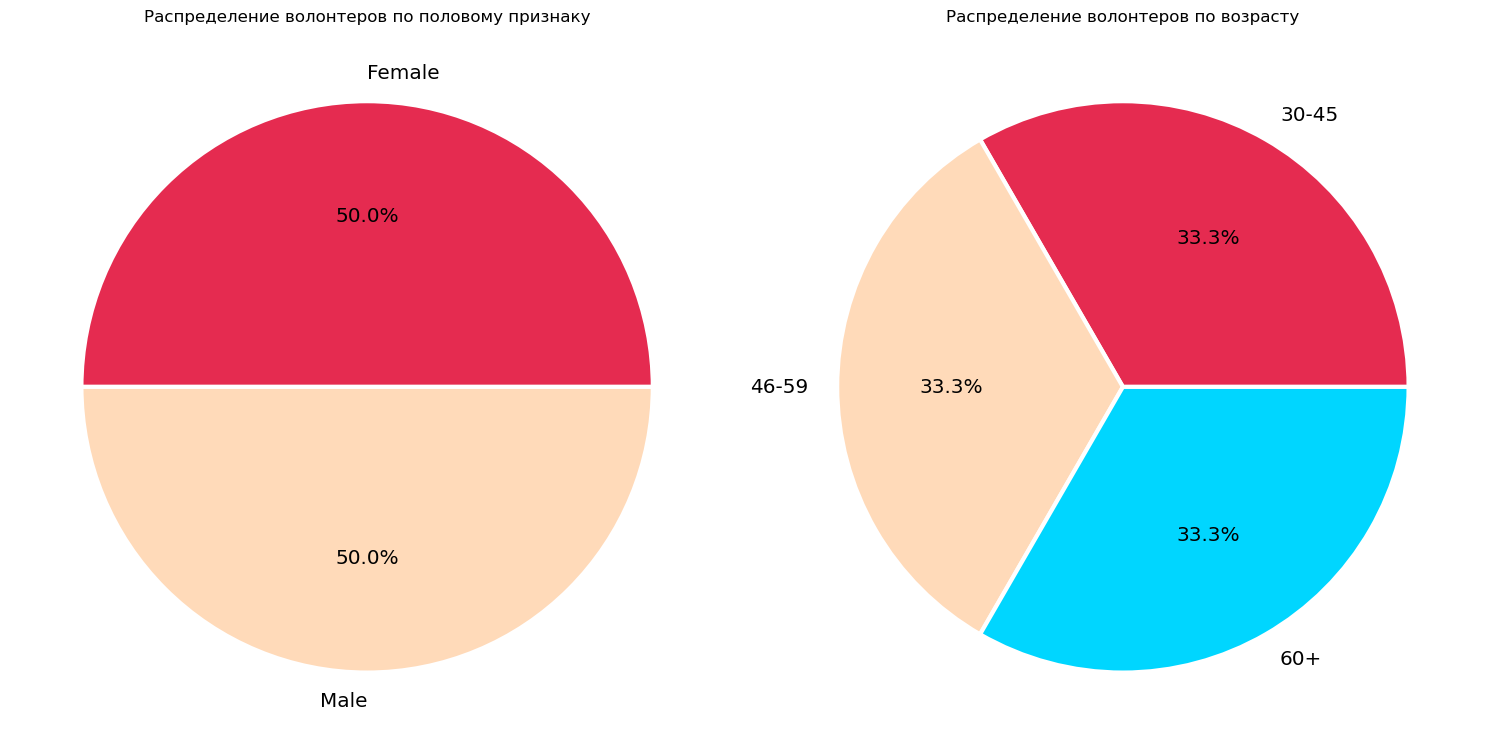

In [8]:
# построение круговых диаграмм по возрастному распределению и полу
plt.figure(figsize=(15, 15))
df.pivot_table(index='sex', values='volunteer_id', aggfunc='count').plot(kind='pie',
               y="volunteer_id",
               autopct='%.1f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               colors = ['#e52b50', '#ffdab9', '#00d6ff', '#ffff00', '#d9b9ff'],
               label='', # подпись 
               legend = False,      
               title = f"Распределение волонтеров по половому признаку", 
               ax = plt.subplot(1,2,1))

df.pivot_table(index='agegrp', values='volunteer_id', aggfunc='count').plot(kind='pie',
               y="volunteer_id",      
               autopct='%.1f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               colors = ['#e52b50', '#ffdab9', '#00d6ff', '#ffff00', '#d9b9ff'],
               label='', # подпись 
               legend = False,
               title = f"Распределение волонтеров по возрасту", 
               ax = plt.subplot(1,2,2),
               )
    

plt.tight_layout()
plt.show()

In [9]:
# создание таблицы распределения волонтеров
df.pivot_table(index='agegrp', columns='sex', values='volunteer_id', aggfunc='count')

sex,Female,Male
agegrp,,
30-45,20,20
46-59,20,20
60+,20,20


Из диаграмм мы видим, что группы разделены в равных долях, как по полу, так и по возрасту. При этом внутри возрастных групп волонтеры также разделены в равной доле, по 40 человек на каждую группу.

In [10]:
# вывод статистических характеристик 
df['bp_before'].describe()

count    120.000000
mean     156.450000
std       11.389845
min      138.000000
25%      147.000000
50%      154.500000
75%      164.000000
max      185.000000
Name: bp_before, dtype: float64

In [11]:
# вывод статистических характеристик 
df['bp_after'].describe()

count    120.000000
mean     170.566667
std       13.855032
min      145.000000
25%      160.000000
50%      169.000000
75%      178.250000
max      204.000000
Name: bp_after, dtype: float64

In [12]:
print('Относительный прирост медианы после принятия напитка к группе до принятия напитка', 
      round((df['bp_after'].mean()/df['bp_before'].mean()-1)*100,2), '%')

Относительный прирост медианы после принятия напитка к группе до принятия напитка 9.02 %


Видно, что после употребления напитка медианный показатель сердечного ритма вырос с 154,5 до 169 и прирост составил 9.02%. А максимальный показатель вырос с 185 до 204.

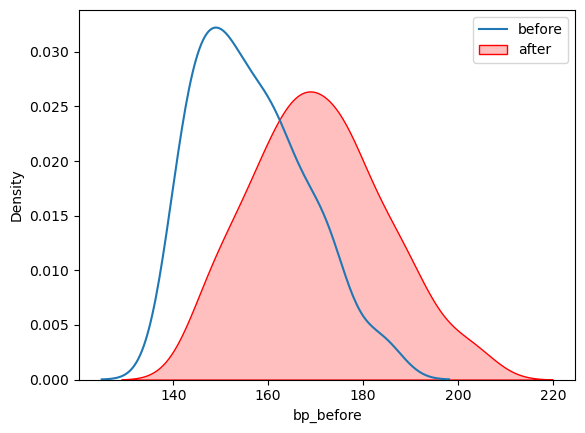

In [13]:
# создание графика измененя частоты сердечных сокращений до/после приема напитка
fig, ax = plt.subplots()
sns.kdeplot(data=df, x="bp_before", ax=ax, label='before')
sns.kdeplot(data=df, x="bp_after", ax=ax, color='red', shade=True, label='after')
plt.legend()
plt.show()

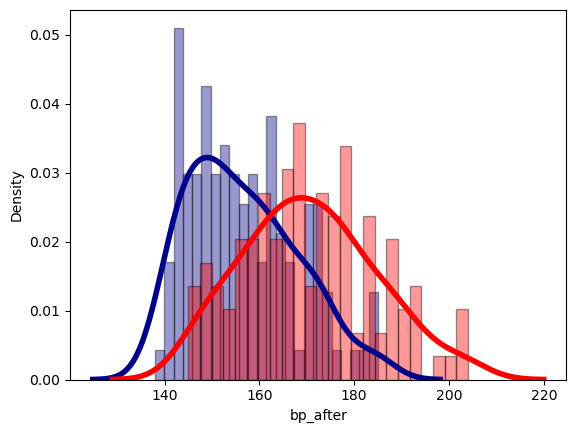

In [14]:
# распределение частоты сердечныйх сокращений
sns.distplot(df["bp_before"], hist=True, kde=True, 
             bins=int(120/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label='ffh')
sns.distplot(df["bp_after"], hist=True, kde=True, 
             bins=int(120/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}, label='ff');

In [15]:
# расчет эксцесса и асимметрии "до" принятия напитка
print(f'Асимметрия составляет {st.skew(df["bp_before"], bias= False)}')

print(f'Эксцесс составляет {st.kurtosis(df["bp_before"], bias= False)}')

Асимметрия составляет 0.5542441047738688
Эксцесс составляет -0.4385909267217514


In [16]:
# расчет эксцесса и асимметрии "после" принятия напитка
print(f'Асимметрия составляет {st.skew(df["bp_after"], bias= False)}')

print(f'Эксцесс составляет {st.kurtosis(df["bp_after"], bias= False)}')


Асимметрия составляет 0.27490431036858204
Эксцесс составляет -0.39867342272385553


*На графике видно, что распределение параметра **после** принятия напитка имеет распределение по форме напоминающее купол, медиана и среднее практически равны, ассиметрия менее выражена.  
Тогда как распределение параметра **до** принятия напитка имеет распределение, отличного от нормального, видим положительную ассиметрию и смещение влево, то есть правосторонняя ассиметрия.
В целом по графику видно, что напиток оказал влияние на частоту сердечных сокращений.*

*Рассчитав показатели ассиметрии и эксцесса, они подтвердили наши выводы.  
Ассиметрия, равная 0.55, означает, что распределение скошено в положительную сторону, и распределение имеет больше значений в хвостах по сравнению с нормальным распределением. Большинство людей имели ЧСС около 154, до того, как приняли напиток. После принятия напитка медианное значение показателя выросло и стало - 169.*

In [17]:
# расчет перцентилей ЧСС до принятия напитка
np.percentile(df["bp_before"], [90, 95, 99])

array([172.1 , 175.05, 184.81])

In [18]:
# расчет перцентилей ЧСС после принятия напитка
np.percentile(df["bp_after"], [90, 95, 99])

array([189.1 , 193.05, 203.62])

Не более 5% волонтеров имели ЧСС больше 175 **до** того, как приняли энергетик. И 1% волонтеров - выше 185.  
**После** принятия напитка картина меняется, не более 5% волонтеров имели ЧСС больше 193. И 1% волонтеров - выше 204.  

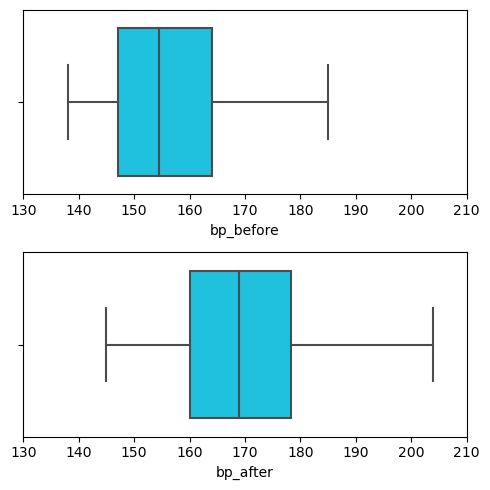

In [19]:
# построение диаграммы размаха
plt.figure(figsize=(5, 5))
plt.subplot (2, 1, 1)
sns.boxplot(x=df["bp_before"], color='#00d6ff')
plt.xlim(130,210)

plt.subplot (2, 1, 2)
sns.boxplot(x=df["bp_after"], color='#00d6ff')
plt.xlim(130,210)

plt.tight_layout()
plt.show()

На диаграммах также наглядно видим, что до принятия напитка медиана смещена слево, то есть до принятия напитков у волонтеров чаще была часта сердечных скоращений в пределах от 147 до 154, реже от 154 до 164.  
После принятия напитка медиана и серднее почти уравнялись. ЧСС имеет значения в основном от 160 до 178. Имеем также длинный правый хвост, то есть весомый разброс значений, не очень однородные данные.  
Видим как после принятия напитка значения сместились в большую сторону, выросла медиана, среднее, максимальное и минимальное значения.

#### Вывод: 

<div style="border:solid pink 5px; padding: 20px">
<li>В таблице представлены мужчины и женщины в возрасте '30-45', '46-59' и '60+'.</li>
<li>Группы поделены равномерно, 60 человек в группе мужчин и 60 - женщин; по 20 человек в каждой возрастной категории.</li>
<li>После употребления напитка медианный показатель сердечного ритма вырос с 154,5 до 169 и прирост составил 9.02%. То есть напиток оказал влияние на волонтеров.</li>
<li>Не более 5% волонтеров имели ЧСС больше 175 до того, как приняли энергетик. И 1% волонтеров - выше 185.</li>
<li>После принятия напитка - не более 5% волонтеров имели ЧСС больше 193. И 1% волонтеров - выше 204.</li>
<li>На графиках видно, что распределение параметра до принятия напитка отлично от нормального, имеет положительную ассиметрию и смещение влево. Большинство людей имели ЧСС около 154, до того, как приняли напиток.</li>
<li>Распределение параметра после принятия напитка имеет распределение по форме напоминающее купол, медиана и среднее практически равны, ассиметрия менее выражена. После принятия напитка медианное значение показателя выросло и стало - 169.</li>
<li>После принятия напитка медиана и серднее почти уравнялись. Увеличилось количество волонтеров с высокими показателями ЧСС.</li>   
</div> 

## Изменение ЧСС в разрезе пола

In [20]:
# создание сводной таблицы с основными описательными статистиками
df.pivot_table(index='sex', values=['bp_before','bp_after'], aggfunc=['mean','median', 'min', 'max'])

mean               median                min                max  \
          bp_after   bp_before bp_after bp_before bp_after bp_before bp_after   
sex                                                                             
Female  166.800000  153.633333    166.5       151      145       138      204   
Male    174.333333  159.266667    172.5       158      153       140      204   

                  
       bp_before  
sex               
Female       185  
Male         185

*Изучим на кого сильнее оказывает влияние энергетический напиток.*  
В таблицу выведены значения мер центральной тенденции. Среднее и медиана до и после принятия напитка у мужчин оказываются выше аналогичных показателей у женщин.

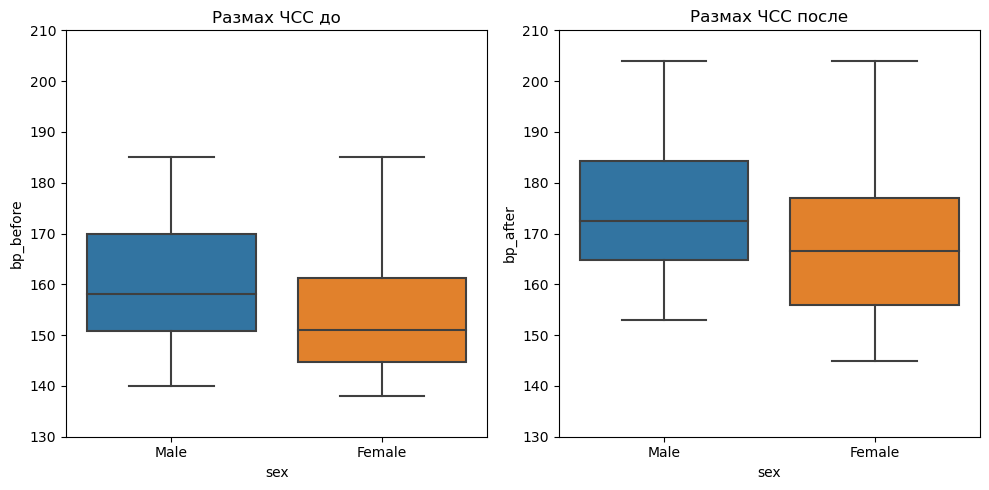

In [21]:
# построение диаграммы размаха
plt.figure(figsize=(10, 5))
plt.subplot (1, 2, 1)
sns.boxplot(x='sex', y='bp_before', data=df).set(title='Размах ЧСС до') 
plt.ylim(130,210)

plt.subplot (1, 2, 2)
sns.boxplot(x='sex', y='bp_after', data=df).set(title='Размах ЧСС после') 
plt.ylim(130,210)

plt.tight_layout()
plt.show()

- До принятия напитка мы видим, что в среднем у мужчин показатель частоты сердечных сокращений(ЧСС) выше, чем у женщин, это видно по медиане на графике Медиана у мужчин - 158, у женщин - 152. При этом у обоих полов большая часть волонтеров имеют ЧСС ниже медианного. Среди мужчин в основном 150-158, а женщин - 144-152. И медиана оказалась ниже среднего по обоим полам, говорит нам об ассиметрии значений. 
- Длина "ящика" у мужчин больше, значит, размах и разброс значений шире у мужчин, больше волонтеров с разными показателями ЧСС, у женщин вариативность меньше. 
- Также края верхнего и нижнего усов у обоих полов находятся приблительно на одном уровне. Значит, есть мужчины и женщины, которые имеют одинаковые показатели ЧСС(185 - максимально, около 139 - минимальный). В целом по обоим полам разброс идет от 140 до 185.
  
  
- Если взглянуть на правый график, то мы видим результат принятия энергетического напитка. Медианные показатели ЧСС у обоих полов возрасли, у мужчин до 172.5, а у женщин - 166.5. При этом отмечается равенство медианного и среднего значений ЧСС у женщин. Значит, теперь показатели ЧСС распределились равномерно среди женщин. У мужчин медиана чуть ниже среднего, значит чаще можно встретить людей с ЧСС от 164.75 до 172.5.  
- Длина "ящика" у мужчин не изменилась, тогда как у женщин он стал длиннее. Значит, напиток оказал разное воздействие на представительниц женского пола, разброс значений стал больше, чем до напитка.  
- Это же напи подтверждает верхний "ус" у женщин. Он длиннее, чем у графика для мужчин. Видим, что у женщин реакция после напитка разная, более вариативна.  
- Максимальные значения снова равны, среди мужчин и женщин есть волонтеры с показателем ЧСС - 204.

In [22]:
#  функция рассчета статистических характеристик группы мужчин и женщин
def statistics(p, arr, arr2):
    for val in arr2:
        for el in arr:
            print(f'{val} {el}:')
            print(df.loc[df[p]==val][el].describe())
            print()

In [23]:
# вывод статистических характеристик для мужчин и женщин до/после принятия
statistics('sex', ['bp_before', 'bp_after'], ['Male', 'Female'])

Male bp_before:
count     60.000000
mean     159.266667
std       11.413442
min      140.000000
25%      150.750000
50%      158.000000
75%      170.000000
max      185.000000
Name: bp_before, dtype: float64

Male bp_after:
count     60.000000
mean     174.333333
std       12.650004
min      153.000000
25%      164.750000
50%      172.500000
75%      184.250000
max      204.000000
Name: bp_after, dtype: float64

Female bp_before:
count     60.000000
mean     153.633333
std       10.735600
min      138.000000
25%      144.750000
50%      151.000000
75%      161.250000
max      185.000000
Name: bp_before, dtype: float64

Female bp_after:
count     60.000000
mean     166.800000
std       14.081843
min      145.000000
25%      156.000000
50%      166.500000
75%      177.000000
max      204.000000
Name: bp_after, dtype: float64



Вывод статистик подтверждает наши выводы из графика.  Мы видим, что среднее квадратичное отклонение(корень из дисперсии) после принятия напитка у женщин выше, чем у мужчин, и в целом оно выросло по сравнению с ДО сильнее, чем у мужчин. У женщин: до - 10.7, после - 14. У мужчин: до - 11.4, после - 12.6. Этот показатель отражает разброс наших данных в выборке. То есть напиток на женщин оказал разное влияние, неоднозначное.

In [24]:
# функция рассчета перцентилей и дисперсии
def percentile_var(p, arr, arr2):
    for val in arr2:
        for el in arr:
            print(f'{val} {el}:')
            print(np.percentile(df.loc[df[p]==val][el], [90, 95, 99]))
            print(np.var(df.loc[df[p]==val][el], ddof=1))            
            print()    

In [25]:
# вызов функции для расчета перцентилей и дисперсии у мужчин и женщин до/после принятия
percentile_var('sex', ['bp_before', 'bp_after'], ['Male', 'Female'])

Male bp_before:
[175.   176.2  184.41]
130.26666666666665

Male bp_after:
[193.   194.2  202.82]
160.02259887005647

Female bp_before:
[167.1  170.15 183.82]
115.25310734463275

Female bp_after:
[184.   187.15 202.23]
198.2983050847458



**До принятия напитка**:
- среди мужчин и женщин не более 1% волонтеров имели показатель ЧСС равный  около 184
- среди мужчин 90% всех волонтеров имели ЧСС не выше 175
- среди женщин 90% всех волонтеров имели ЧСС не выше 167
  
**После принятия напитка**:
- среди мужчин и женщин не более 1% волонтеров имели показатель ЧСС равный около 202
- среди мужчин 90% всех волонтеров имели ЧСС не выше 193
- среди женщин 90% всех волонтеров имели ЧСС не выше 184

Стоит отметить, что до принятия напитка дисперсия у мужчин была выше - 130 против 115. Говорит о том, что у мужчин показатели ЧСС были менее однородны, то есть много волонтеров с разным значением параметра.  
Но после употребления напитка, дисперсия у женщин выросла значительно сильнее - 198 против 160. Значит, у женщин показатели ЧСС очень сильно варьируются, множество отдельных точек данных отличаются от среднего, более сильный и существенный разброс, чем среди мужчин.

Посмотрим на изменение средних.

In [26]:
# функция расчета относительной разницы между группами
men_mean_before = np.mean(df.query('sex=="Male"')["bp_before"])
female_mean_before = np.mean(df.query('sex=="Female"')["bp_before"])
men_mean_after = np.mean(df.query('sex=="Male"')["bp_after"])
female_mean_after = np.mean(df.query('sex=="Female"')["bp_after"])

def difference_mean_sex(d1, d2, n1, n2, n3, n4):
    arr = ['мужчин', 'женщин', 'до', 'после']
    print(f'Разница между группой {arr[n1]} {arr[n2]} принятия напитка и группой {arr[n3]} {arr[n4]} принятия составляет', 
          round((d1/d2-1)*100,2), '%')

In [27]:
# сравнение средних в группе мужчин до/после принятия напитка
difference_mean_sex(men_mean_after, men_mean_before, 0, 3, 0, 2)

Разница между группой мужчин после принятия напитка и группой мужчин до принятия составляет 9.46 %


In [28]:
# сравнение средних в группе женщин до/после принятия напитка
difference_mean_sex(female_mean_after, female_mean_before, 1, 3, 1, 2)

Разница между группой женщин после принятия напитка и группой женщин до принятия составляет 8.57 %


Видно, что относительный прирост среднего среди мужчин выше - 9.46% против 8.57% у женщин. Значит, у мужчин после принятия напитка ЧСС выросла сильнее, на мужчин напиток оказал существеннее влияние, чем на женщин.  

In [29]:
# сравнение средних между М и Ж до принятия напитка
difference_mean_sex(men_mean_before, female_mean_before, 0, 2, 1, 2)

Разница между группой мужчин до принятия напитка и группой женщин до принятия составляет 3.67 %


In [30]:
# сравнение средних между М и Ж после принятия напитка
difference_mean_sex(men_mean_after, female_mean_after, 0, 3, 1, 3)

Разница между группой мужчин после принятия напитка и группой женщин после принятия составляет 4.52 %


Сравнив группы мужчин и женщин до/после напитка, стоит отметить, что разрыв между группами увеличился после употребления напитка.  
Все это еще раз подтверждает предположение о том, что на мужчин напиток оказывает влияние сильнее, чем на женщин.  
Необходимо проверить, имеет ли эта разница статистическую значимость, или же она вызвана шумом в данных.

Прежде чем приступать к стат.тесту значимости разницы средних, оценим равенство дисперсий выборок, чтобы понять, какой критерий при тестировании нам применить.

*Сформулируем две гипотезы:*  
**H_0**: Дисперсии по выборке сердечных сокращений у мужчин и женщин до принятия напитка равны   
**H_a**: Дисперсии по выборке сердечных сокращений у мужчин и женщин до принятия напитка равны   
*Уровень статистической значимости примем: alpha = 0.05.*
  
*Применим метод F-критерий Фишера. Рассчитаем f-критерий и оценим уровень его значимости.*  
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу о равенстве отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

In [31]:
# оценка равенства дисперсий, F-тест

# F-критерий
F = np.var(df.query('sex=="Male"')["bp_before"], ddof=1) / np.var(df.query('sex=="Female"')["bp_before"], ddof=1)

# число степеней свободы
df1 = len(df.query('sex=="Male"')["bp_before"]) - 1
df2 = len(df.query('sex=="Female"')["bp_before"]) - 1

alpha = 0.05 
p_value = 1 - st.f.cdf(F, df1, df2)
if p_value < alpha:
    print(f'p_value: {p_value}, отвергаем нулевую гипотезу о том, что дисперсии у групп равны')
else:
    print(f'p_value: {p_value}, не можем отвергнуть нулевую гипотезу')
   

p_value: 0.3198366468088383, не можем отвергнуть нулевую гипотезу


*Сформулируем две гипотезы:*  
**H_0**: Дисперсии по выборке сердечных сокращений у мужчин и женщин после принятия напитка равны   
**H_a**: Дисперсии по выборке сердечных сокращений у мужчин и женщин после принятия напитка равны   
*Уровень статистической значимости примем: alpha = 0.05.*
  
*Применим метод F-критерий Фишера. Рассчитаем f-критерий и оценим уровень его значимости.*  
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу о равенстве отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

In [32]:
# оценка равенства дисперсий, F-тест

# F-критерий
F = np.var(df.query('sex=="Male"')["bp_after"], ddof=1) / np.var(df.query('sex=="Female"')["bp_after"], ddof=1)

# число степеней свободы
df1 = len(df.query('sex=="Male"')["bp_after"]) - 1
df2 = len(df.query('sex=="Female"')["bp_after"]) - 1

alpha = 0.05 
p_value = 1 - st.f.cdf(F, df1, df2)
if p_value < alpha:
    print(f'p_value: {p_value}, отвергаем нулевую гипотезу о том, что дисперсии у групп равны')
else:
    print(f'p_value: {p_value}, не можем отвергнуть нулевую гипотезу')

p_value: 0.7937141828222993, не можем отвергнуть нулевую гипотезу


<li>F-тест показал, что <b>у нас нет достаточных оснований отвергнуть нулевую гипотезу</b> о том, что между дисперсиями групп мужчин и женщин нет разницы.</li>
<li>Будем считать, что дисперсии равны, как до принятия напитка, так и после.</li> 

#### Вывод: 

<div style="border:solid pink 5px; padding: 20px">
<li>Были изучены две выборки в разрезе пола: мужчины и женщины, чтобы оценить пригодность выборки для анализа</li>
<li>Размеры выборок равны между собой и составляют - 60 волонтеров</li>    
<li>Данные в выборках имеют нормальное распределение.</li> 
<li>Относительное изменение средней ЧСС после принятия напитка у мужчин - 9.46%, у женщин - 8.57%.</li>    
<li>Относительный прирост среднего в группе мужчин к группе женщин после напитка составляет 4.5%, до принятия - 3.67%, разрыв между группами увеличился после употребления напитка.</li>
<li>Был проведен F-тест Фишера, который показал, что дисперсии выборок равны.</li>    
<li>Делаем предположение, что на мужчин энергетический напиток оказал влияние сильнее, чем на женщин. Показатель частоты сердечных сокращений вырос сильнее, чем у женщин.</li>  
</div>

## А/В-тест изменения ЧСС у мужчин относительно женщин до/после принятия напитка

Рассмотрим, значимо ли различие между средними двух выборок или нет.

*Сформулируем две гипотезы:*  
**H_0**: Средние частоты сердечных сокращений у мужчин и женщин до принятия напитка равны   
**H_a**: Средние частоты сердечных сокращений у мужчин и женщин до принятия напитка не равны   
  
*Гипотезы двусторонние. Мы должны сравнить средние по двум независимым выборкам, поэтому применим метод - ttest_ind из библиотеки scipy для сравнения средних двух выборок.*  

*Уровень статистической значимости примем: alpha = 0.05. Используем поправку Бонферрони, чтобы снизить групповую вероятность ошибки первого рода и скорректировать требуемые уровни значимости, разделим на 7(число гипотез в тесте).*

*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу о равенстве средних отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

*Дисперсии равны, необходимо указать equal_var=True*  

In [33]:
# функция проверки гипотез
def hypothesis(d1, d2, p):
    alpha = .05/7
    results = st.ttest_ind(d1, d2, equal_var=p)

    print('p-value составляет ', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не можем отвергнуть нулевую гипотезу')

In [34]:
# проверка первой гипотезы
hypothesis(df.query('sex=="Male"')["bp_before"], df.query('sex=="Female"')["bp_before"], True)

p-value составляет  0.006240699234389026
Отвергаем нулевую гипотезу


*Сформулируем две гипотезы:*  
**H_0**: Средние частоты сердечных сокращений у мужчин и женщин после принятия напитка равны   
**H_a**: Средние частоты сердечных сокращений у мужчин и женщин после принятия напитка не равны   
  
*Гипотезы двусторонние. Мы должны сравнить средние по двум независимым выборкам, поэтому применим метод - ttest_ind из библиотеки scipy для сравнения средних двух выборок.*  

*Уровень статистической значимости примем: alpha = 0.05. Используем поправку Бонферрони, чтобы снизить групповую вероятность ошибки первого рода и скорректировать требуемые уровни значимости, разделим на 7(число гипотез в тесте).*
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу о равенстве средних отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

*Дисперсии равны, необходимо указать equal_var=True*  

In [35]:
# проверка второй гипотезы
hypothesis(df.query('sex=="Male"')["bp_after"], df.query('sex=="Female"')["bp_after"], True)

p-value составляет  0.0025544462081737306
Отвергаем нулевую гипотезу


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li><b>p-value = 0.006</b> меньше заданного уровня стат.значимости.</li>
    <li>Такое значение p-value говорит нам о том, что вероятность случайного различия средней частоты сокращений между группами крайне мала и составляет менее 1%. Значит, <b>разница средней частоты сердечных сокращений у мужчин и женщин до принятия напитка статистически значима</b>.</li> 
<li>Значит, <b>нулевую гипотезу</b> о том, что статистически значимых различий в средней частоте сердечных сокращений у мужчин и женщин до принятия напитка нет,<b>мы отвергаем</b>.</li> 
<li>Относительная разница между группой мужчин и женщин составила <b>3.67%</b>. То есть группа мужчин имеет среднюю ЧСС выше, чем группа женщин, до принятия напитка на 3.67%.</li> 
<li>Результаты по средней частоте ЧСС после принятия напитка между группами не изменились, разница между средними оказалась также статистически значима, меньше alpha. Значение p-value уменьшилось - 0.003, а средняя частота сокращений по группе мужчин выросла еще сильнее относительно группы женщин - на 4.52%. Нет оснований принять нулевую гипотезу</li>
<li><b>На основе полученных данных, можно сделать вывод, что энергетический напиток Redbull оказывает влияние на организм женщин и мужчин, повышая уровень частоты сердечных сокращений. При этом энергетик сильнее влияет на организм мужчин, повышая показатель на 4.52% сильнее.</b></li>   
    </div>

## А/В-тест изменения ЧСС у мужчин до/после принятия напитка

*Сформулируем две гипотезы:*  
**H_0**: Средние частоты сердечных сокращений у мужчин до и после принятия напитка равны 
**H_a**: Средние частоты сердечных сокращений у мужчин до и после принятия напитка не равны 
  
*Гипотезы двусторонние. Мы должны сравнить средние по двум зависимым выборкам, поэтому применим метод - ttest_rel из библиотеки scipy для сравнения средних двух выборок.*  

*Уровень статистической значимости примем: alpha = 0.05. Используем поправку Бонферрони, чтобы снизить групповую вероятность ошибки первого рода и скорректировать требуемые уровни значимости, разделим на 7(число гипотез в тесте).*
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу о равенстве средних отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

In [36]:
# функция проверки гипотез
def hypothesis_sex(d1,d2):
    alpha = .05/7
    results = st.ttest_rel(d1, d2)

    print('p-value составляет ', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не можем отвергнуть нулевую гипотезу')
    

In [37]:
# проверка третьей гипотезы
hypothesis_sex(df.query('sex=="Male"')["bp_before"],df.query('sex=="Male"')["bp_after"])

p-value составляет  2.158639987687538e-25
Отвергаем нулевую гипотезу


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li><b>p-value крайне мало</b>, меньше заданного уровня стат.значимости.</li>
    <li>Такое значение p-value говорит нам о том, что <b>вероятность случайного различия средней частоты сокращений у мужчин до и после принятия напитка мала и составляет менее 1%, она статистически значима</b>.</li> 
<li>Значит, <b>нулевую гипотезу</b> о том, что статистически значимых различий в средней частоте сердечных сокращений до/после принятия напитка нет,<b>мы отвергаем</b>.</li> 
<li>Относительная разница среднего между группами мужчин до/после напитка составила <b>9.46%</b>. То есть группа мужчин после принятия напитка имеет среднюю ЧСС выше, чем группа мужчин, до принятия напитка на 9.46%.</li> 
<li><b>На основе полученных данных, можно сделать вывод, что энергетический напиток Redbull действительно оказывает влияние на организм мужчин, повышая уровень частоты сердечных сокращений.</b></li>   
    </div>

## А/В-тест изменения ЧСС у женщин до/после принятия напитка

*Сформулируем две гипотезы:*  
**H_0**: Средние частоты сердечных сокращений у женщин до и после принятия напитка равны 
**H_a**: Средние частоты сердечных сокращений у женщин до и после принятия напитка не равны 
  
*Гипотезы двусторонние. Мы должны сравнить средние по двум зависимым выборкам, поэтому применим метод - ttest_rel из библиотеки scipy для сравнения средних двух выборок.*  

*Уровень статистической значимости примем: alpha = 0.05. Используем поправку Бонферрони, чтобы снизить групповую вероятность ошибки первого рода и скорректировать требуемые уровни значимости, разделим на 7(число гипотез в тесте).*
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу о равенстве средних отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

In [38]:
# проверка четвертой гипотезы
hypothesis_sex(df.query('sex=="Female"')["bp_before"],df.query('sex=="Female"')["bp_after"])

p-value составляет  7.052022913034368e-24
Отвергаем нулевую гипотезу


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li><b>p-value крайне мало</b>, меньше заданного уровня стат.значимости.</li>
<li>Такое значение p-value говорит нам о том, что <b>вероятность случайного различия средней частоты сокращений у женщин до и после принятия напитка мала и составляет менее 1%, она статистически значима</b>.</li> 
<li>Значит, <b>нулевую гипотезу</b> о том, что статистически значимых различий в средней частоте сердечных сокращений до/после принятия напитка нет,<b>мы отвергаем</b>.</li> 
<li>Относительная разница среднего между группами женщин до/после принятия напитка составила <b>8.57%</b>. То есть группа мужчин после принятия напитка имеет среднюю ЧСС выше, чем группа мужчин, до принятия напитка на 8.57%.</li> 
<li><b>На основе полученных данных, можно сделать вывод, что энергетический напиток Redbull действительно оказывает влияние на организм женщин, повышая уровень частоты сердечных сокращений.</b></li>   
    </div>

## А/В-тест изменения ЧСС в разрезе возрастных групп

In [39]:
# создание сводной таблицы с основными описательными статистиками
df.pivot_table(index='agegrp', values=['bp_after','bp_before'], aggfunc=['mean','median', 'min', 'max'])

mean             median                min                max  \
       bp_after bp_before bp_after bp_before bp_after bp_before bp_after   
agegrp                                                                     
30-45   165.550   151.675    165.5     149.5      146       138      194   
46-59   170.525   155.100    170.0     154.0      145       140      204   
60+     175.625   162.575    176.5     162.0      148       142      204   

                  
       bp_before  
agegrp            
30-45        176  
46-59        185  
60+          185

*Изучим на кого сильнее оказывает влияние энергетический напиток.*  
В таблицу выведены значения мер центральной тенденции. 
- Среднее и медиана после принятия напитка выросли по каждой возрастной категории.
- Сильнее всего средняя ЧСС выросла в группе 46-59 - на 9.95%. Затем идет группа 30-45 лет - на 9.15%, замыкает 60+ - на 8.03%.
- Показатель среднего и медианы во всех групп практически равен, это говорит о том, что значения распределены равномерно, без ассиметрии.
- Показатель минимальной частоты сокращений вырос в каждой группе, как и показатель максимальной частоты. При этом максимальная ЧСС в группах 46-59 и 60+ оказались равны друг другу - 204.

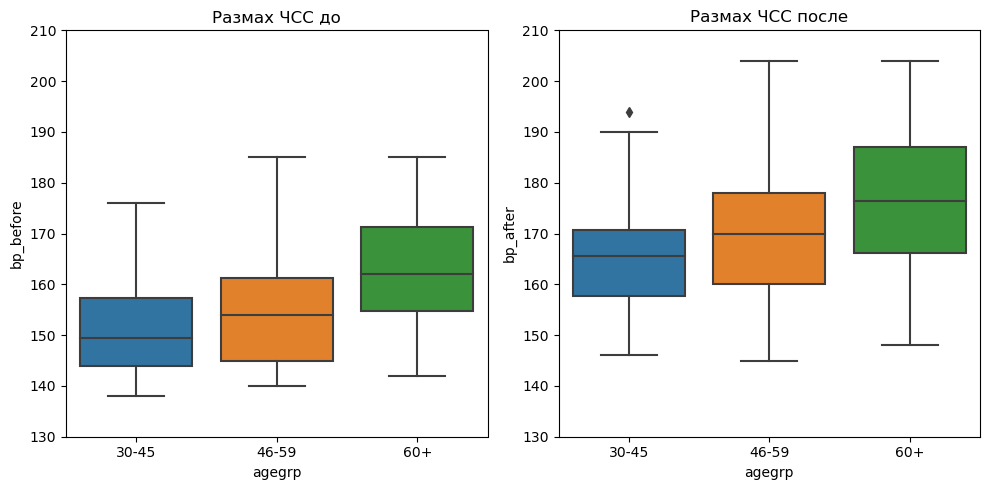

In [40]:
# построение диаграммы размаха
plt.figure(figsize=(10, 5))
plt.subplot (1, 2, 1)
sns.boxplot(x='agegrp', y='bp_before', data=df).set(title='Размах ЧСС до') 
plt.ylim(130,210)

plt.subplot (1, 2, 2)
sns.boxplot(x='agegrp', y='bp_after', data=df).set(title='Размах ЧСС после') 
plt.ylim(130,210)

plt.tight_layout()
plt.show()

In [51]:
# срез строки с выбросом
df.query('agegrp=="30-45" and bp_after>190')

,volunteer_id,sex,agegrp,bp_before,bp_after
17,18,Male,30-45,176,194


- До принятия напитка на графике видно, что в среднем показатель частоты сокращений выше в группе 60+, что показывает медиана - 162. Ниже всего частота сокращений в группе 30-45 - 149.5. 
- В группе 30-45 лет большая часть волонтеров имеют частоту сокращений ниже медианной, то есть ниже 149.5(так как медиана смещена к нижнему краю графика). 
- В группе 46-59 лет обратная ситуация, большая часть волонтеров имеют частоту сокращений выше медианной(154).
- 60+ группа схожа с группой 30-45, здесь медиана смещена ближе к нижнему краю, но это не так ярко выражено, но все же здесь также наблюдается большее число людей с показателями частоты ниже медианного значения.
- Если говорить про "усы" графиков, то нижние показатели частоты сокращений (нижняя граница усов) в трех группах приблизительно одинаковы, держатся на уровне около 140.
- Верхняя граница "усов" в группах 46-59 и 60+ на одном уровне, то есть в этих группах есть люди с одинаковыми показателями.
- Заметно, что в группе 46-59 ящик весьма длинный, значит в данной группе большой разброс значений, а длинный верхний ус говорит о том, что в группе есть длинный правый "хвост", много высоких значений показателя.
- Похожая картина в группе 60+, здесь также длинынй ящик, что говорит о большой вариативности частоты сокращений, но усы равны, данные более равномерно распределены.
- Выбросов нет.
  
  
- Если взглянуть на правый график, то мы видим результат принятия энергетического напитка. Медианные показатели ЧСС у трех групп возрасли, 30-45 - до 165.5, а у 46-59 - до 170, 60+ - до 176.5. 
- В группах 30-45 и 46-59 лет большая часть волонтеров имеют частоту сокращений выше медианной(медиана смещена к верхнему краю ящика). 
- 60+ группа отличается, здесь показатели распределились равномерно, медиана почти равна среднему. В группе примерно одинаковое соотношение людей с частотой ниже/выше медианного значения. 
- Нижние границы усов в трех группах снова приблизительно одинаковы, держатся на уровне около 147-148.
- Верхняя граница "усов" в группах 46-59 и 60+ снова на одном уровне, то есть в этих группах есть люди с одинаковыми показателями.
- Самый длинный ящик - в группе 60+, здесь показатели частоты сокращений очень сильно разбросаны, волонтеры дали разную реакцию на напиток, следом идет группа - 46-59. 
- Длина усов в группе 60+ снова показывает более нормальное распределение показателей частоты сокращений в группе. Группа 46-59 и 30-45 имеют длинный верхний ус, что говорит о длинном "хвосте" графика, то есть около 25% волонтеров имеют частоту сокращений выше 178 и 170 соответственно. 
- Также точка на графике в группе 30-45 - выброс, аномально высокое значение частоты сокращений, которое не является статистически значимым для анализа. Срез строки показал нам, что выбросом является мужчина, у которого частота сокращений после принятия напитка стала равна - 194.
  

In [41]:
# вывод статистических характеристик для групп в разрезе возраста до/после принятия напитка
statistics('agegrp', ['bp_before', 'bp_after'], ['30-45', '46-59', '60+'])

30-45 bp_before:
count     40.000000
mean     151.675000
std        9.258087
min      138.000000
25%      144.000000
50%      149.500000
75%      157.250000
max      176.000000
Name: bp_before, dtype: float64

30-45 bp_after:
count     40.000000
mean     165.550000
std       11.564646
min      146.000000
25%      157.750000
50%      165.500000
75%      170.750000
max      194.000000
Name: bp_after, dtype: float64

46-59 bp_before:
count     40.000000
mean     155.100000
std       11.459628
min      140.000000
25%      145.000000
50%      154.000000
75%      161.250000
max      185.000000
Name: bp_before, dtype: float64

46-59 bp_after:
count     40.000000
mean     170.525000
std       13.731841
min      145.000000
25%      160.000000
50%      170.000000
75%      178.000000
max      204.000000
Name: bp_after, dtype: float64

60+ bp_before:
count     40.000000
mean     162.575000
std       10.727122
min      142.000000
25%      154.750000
50%      162.000000
75%      171.250000
max      

Вывод статистик подтверждает наши выводы из графика. Мы видим, что среднее квадратичное отклонение(корень из дисперсии) после принятия напитка у группы 60+ выше, чем у остальных, и в целом оно выросло по сравнению с ДО сильнее, чем у мужчин. 60+: до - 10.7, после - 14.5. У 46-59: до - 11.6, после - 13.7. У 30-35: до - 9.3, после - 11.6. Этот показатель отражает разброс наших данных в выборке. То есть напиток на группу волонтеров в возрасте 60+ оказал разное влияние, неоднозначное.

In [42]:
# вызов функции для расчета перцентилей и дисперсии у групп в разрезе возраста до/после принятия напитка
percentile_var('agegrp', ['bp_before', 'bp_after'], ['30-45', '46-59', '60+'])

30-45 bp_before:
[165.1  167.3  174.83]
85.71217948717947

30-45 bp_after:
[182.1  184.3  192.44]
133.74102564102563

46-59 bp_before:
[170.   175.45 184.61]
131.32307692307694

46-59 bp_after:
[187.   193.45 203.22]
188.56346153846158

60+ bp_before:
[175.   180.15 184.22]
115.07115384615386

60+ bp_after:
[193.   198.15 202.83]
211.36858974358975



**До принятия напитка**:
- среди 30-45 лет не более 1% волонтеров имели показатель ЧСС равный около 175
- среди 46-59 лет не более 1% волонтеров имели показатель ЧСС равный около 185
- среди 60+ лет не более 1% волонтеров имели показатель ЧСС равный около 184
  
**После принятия напитка**:
- среди 30-45 лет не более 1% волонтеров имели показатель ЧСС равный около 192
- среди 46-59 лет не более 1% волонтеров имели показатель ЧСС равный около 203.2
- среди 60+ лет не более 1% волонтеров имели показатель ЧСС равный около 202.8

Стоит еще раз отметить, что до принятия напитка дисперсия у группы 46-59 была самая высокая - 131. Говорит о том, что у группы 46-59 лет показатели ЧСС были менее однородны, то есть много волонтеров с разным значением параметра.  
Но после употребления напитка, дисперсия у группы 60+ выросла значительно сильнее - 211 (до напитка 115). Значит, у волонтеров в возрасте 60+ показатели ЧСС очень сильно варьируются, множество отдельных точек данных отличаются от среднего, более сильный и существенный разброс, чем среди других возрастов.

Посмотрим на разницу и изменение средних в трех группах.

In [54]:
# расчет относительной разницы между группами
thirty_mean_after = np.mean(df.query('agegrp=="30-45"')["bp_after"])
forty_mean_after = np.mean(df.query('agegrp=="46-59"')["bp_after"])
sixty_mean_after = np.mean(df.query('agegrp=="60+"')["bp_after"])

forty_mean_before = np.mean(df.query('agegrp=="46-59"')["bp_before"])
sixty_mean_before = np.mean(df.query('agegrp=="60+"')["bp_before"])

def difference_mean(d1, d2, n1, n2, n3):
    arr = ['30-45', '46-59', '60+']
    print(f'Разница между средней частотой сердечных сокращений в группах {arr[n1]} и {arr[n2]} {n3} принятия напитка -', 
      round(d1-d2,2))
      
    print('Относительный прирост среднего в группе 46-59 к группе 30-45 лет составляет', 
      round((d1/d2-1)*100,2), '%')

In [56]:
# сравнение средних между 30-45 и 46-59 лет после принятия напитка
difference_mean(forty_mean_after, thirty_mean_after, 1, 0, 'после')

Разница между средней частотой сердечных сокращений в группах 46-59 и 30-45 после принятия напитка - 4.97
Относительный прирост среднего в группе 46-59 к группе 30-45 лет составляет 3.01 %


In [57]:
# сравнение средних между 30-45 и 60+ лет после принятия напитка
difference_mean(sixty_mean_after, thirty_mean_after, 2, 0, 'после')

Разница между средней частотой сердечных сокращений в группах 60+ и 30-45 после принятия напитка - 10.07
Относительный прирост среднего в группе 46-59 к группе 30-45 лет составляет 6.09 %


In [55]:
# сравнение средних между 46-59 и 60+ лет после принятия напитка
difference_mean(sixty_mean_after, forty_mean_after, 2, 1, 'после')

Разница между средней частотой сердечных сокращений в группах 60+ и 46-59 после принятия напитка - 5.1
Относительный прирост среднего в группе 46-59 к группе 30-45 лет составляет 2.99 %


In [58]:
# сравнение средних между 46-59 и 60+ лет до принятия напитка
difference_mean(sixty_mean_before, forty_mean_before, 2, 1, 'до')

Разница между средней частотой сердечных сокращений в группах 60+ и 46-59 до принятия напитка - 7.47
Относительный прирост среднего в группе 46-59 к группе 30-45 лет составляет 4.82 %


Сравнив среднюю ЧСС в группах разного возраста между собой, мы видим, что наибольшая разница - между группами 60+ и 30-45 - около 6%. Самая незначительная разница - между группами 60+ и 46-59 - 2.99%, но при этом ДО употребления напитка разница была существеннее - 4.82%. Такое сокращение разрыва связано с тем, что в группе 46-59 значение ЧСС выросло сильнее других групп - на 9.95%. 
  
Сравнив группы до/после напитка, стоит отметить, что разрыв между группами сократился после употребления напитка, только между 30-45 и 46-59 он незначительно вырос.  
Это дает нам неоднозначные результаты влияния напитка. **Можно предположить, что наиболее существенное влияние напиток оказывается на группу 46-59.**

Перейдем к тестированию гипотез.

*Сформулируем две гипотезы:*  
**H_0**: Средние частоты сердечных сокращений в группе 30-45 лет и 46-59 лет после принятия напитка равны     
**H_a**: Средние частоты сердечных сокращений в группе 30-45 лет и 46-59 лет после принятия напитка не равны 
  
*Гипотезы двусторонние. Мы должны сравнить средние по двум независимым выборкам, поэтому применим метод - ttest_ind из библиотеки scipy для сравнения средних двух выборок.*  

*Уровень статистической значимости примем: alpha = 0.05. Используем поправку Бонферрони, чтобы снизить групповую вероятность ошибки первого рода и скорректировать требуемые уровни значимости, разделим на 7(число гипотез в тесте).*
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу о равенстве средних отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

*Дисперсии не равны, необходимо указать equal_var=False*  

In [47]:
# проверка пятой гипотезы
hypothesis(df.query('agegrp=="30-45"')["bp_after"], df.query('agegrp=="46-59"')["bp_after"], False)

p-value составляет  0.08370896452906318
Не можем отвергнуть нулевую гипотезу


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li><b>p-value = 0.08</b>, что выше заданного уровня стат.значимости.</li>
    <li>Такое значение p-value говорит нам о том, что вероятность случайного различия средней частоты сокращений между группами велика, при отвержении нулевой гипотезы мы можем получить ошибку первого рода в 8% случаев. Значит, <b>разница средней частоты сердечных сокращений в группах 30-45 и 45-59 лет статистически незначима</b>.</li> 
<li>Значит, <b>нулевую гипотезу</b> о том, что средние частоты сокращений равны,<b>мы не можем отвергнуть</b>.</li> 
<li><b>На основе полученных данных, можно сделать вывод, что энергетический напиток Redbull оказывает влияние на организм людей в возрасте 30-45 и 45-59 лет одинаковое влияние.</b></li>   
    </div>

*Сформулируем две гипотезы:*  
**H_0**: Средние частоты сердечных сокращений в группе 30-45 лет и 60+ лет после принятия напитка равны     
**H_a**: Средние частоты сердечных сокращений в группе 30-45 лет и 60+ лет после принятия напитка не равны 
  
*Гипотезы двусторонние. Мы должны сравнить средние по двум независимым выборкам, поэтому применим метод - ttest_ind из библиотеки scipy для сравнения средних двух выборок.*  

*Уровень статистической значимости примем: alpha = 0.05. Используем поправку Бонферрони, чтобы снизить групповую вероятность ошибки первого рода и скорректировать требуемые уровни значимости, разделим на 7(число гипотез в тесте).*
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу о равенстве средних отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

*Дисперсии не равны, необходимо указать equal_var=False*  

In [48]:
# проверка шестой гипотезы
hypothesis(df.query('agegrp=="30-45"')["bp_after"], df.query('agegrp=="60+"')["bp_after"], False)

p-value составляет  0.000988735090135298
Отвергаем нулевую гипотезу


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li><b>p-value = 0.001</b>, что значительно ниже заданного уровня стат.значимости.</li>
<li>Такое значение p-value говорит нам о том, что вероятность случайного различия средней частоты сокращений между группами мала. Значит, <b>разница средней частоты сердечных сокращений в группах 30-45 и 60+ лет статистически значима</b>.</li> 
<li>Значит, <b>нулевую гипотезу</b> о том, что средние частоты сокращений равны,<b>мы не можем принять</b>.</li> 
<li><b>На основе полученных данных, можно сделать вывод, что энергетический напиток Redbull оказывает разное влияние на организм людей в возрасте 30-45 и 60+ лет.</b></li>   
    </div>

*Сформулируем две гипотезы:*  
**H_0**: Средние частоты сердечных сокращений в группе 46-59 лет и 60+ лет после принятия напитка равны     
**H_a**: Средние частоты сердечных сокращений в группе 46-59 лет и 60+ лет после принятия напитка не равны 
  
*Гипотезы двусторонние. Мы должны сравнить средние по двум независимым выборкам, поэтому применим метод - ttest_ind из библиотеки scipy для сравнения средних двух выборок.*  

*Уровень статистической значимости примем: alpha = 0.05. Используем поправку Бонферрони, чтобы снизить групповую вероятность ошибки первого рода и скорректировать требуемые уровни значимости, разделим на 7(число гипотез в тесте).*
  
*Посчитаем p-value, сравним его значение с alpha. Если p-value окажется меньше, то нулевую гипотезу о равенстве средних отвергнем. В ином случае, данные не позволяют нам отвергнуть нулевую гипотезу.*

*Дисперсии не равны, необходимо указать equal_var=False* 

In [49]:
# проверка седьмой гипотезы
hypothesis(df.query('agegrp=="46-59"')["bp_after"], df.query('agegrp=="60+"')["bp_after"], False)

p-value составляет  0.110818590925124
Не можем отвергнуть нулевую гипотезу


<div style="border:solid red 1px; padding: 20px"> 
    <b><i>Вывод:</i></b><br>
<li><b>p-value = 0.11</b>, что значительно выше заданного уровня стат.значимости.</li>
<li>Такое значение p-value говорит нам о том, что вероятность случайного различия средней частоты сокращений между группами велика. Значит, <b>разница средней частоты сердечных сокращений в группах 45-59 и 60+ лет статистически незначима</b>.</li> 
<li>Значит, <b>нулевую гипотезу</b> о том, что средние частоты сокращений равны,<b>мы не можем отвергнуть</b>.</li> 
<li><b>На основе полученных данных, можно сделать вывод, что энергетический напиток Redbull оказывает примерно одинаковое воздействие на организм людей в возрасте 46-59 и 60+ лет.</b></li>   
    </div>

#### Вывод: 

<div style="border:solid pink 5px; padding: 20px">
<li>Были изучены три выборки в разрезе возраста: 30-45, 46-50 и 60+, чтобы оценить пригодность выборки для анализа</li>
<li>Размеры выборок равны между собой и составляют - 40 волонтеров в каждой группе</li>    
<li>Данные в выборках имеют нормальное распределение.</li> 
<li>Относительное изменение средней ЧСС после принятия напитка у 30-45 - 9.15%, у 46-59 - 9.95%, у 60+ - 8.03%.</li>
<li>Относительный прирост среднего в группах: 46-59 к 30-45 - 3.01%, 60+ к 30-45 - 6.09%, 60+ к 46-59 - 2.99%</li>
<li>Был проведен t-тест, который оценил значимость этих различий.</li>
<li>Статистическую значимость имеет только разница между группами 60+ и 30-45. В остальных случаях нулевая гипотеза не была отвергнута, говоря о том, что разница между средними вызвана "шумом", имеет случайный характер.</li>     
</div>

## Общий вывод

<p></p>

<div style="border:solid pink 5px; padding: 20px">
<li>Итак, нами был получены данные исследования влияния энергетического напитка на группу 120 волонтеров.</li>    
<li> Прежде чем дать ответ на поставленные перед нами вопросы, был проведен ряд манипуляций с данными. Названия колонок были приведены к единому стилю, строки были проверены на наличие пропусков и дубликатов, а также группы проверены на пересечение.</li> 

    
<li><b><span style="color:#c71585">Результаты А/В-теста</span></b>
    
<li>Нет статистически значимого различия по средней частоте сердечных сокращений между возрастными группами, исключение - между группами 60+ и 30-45. То есть энергетический напиток оказывает более значимое влияние, поднимая уровень частоты сердечных сокращений на 6% сильнее, на людей старше 60 лет, по сравнению с людьми от 30 до 45 лет;</li>
    
<li>По средней частоте сердечных сокращений групп мужчин и женщин выявлено статистически значимое различие. Частота сердечных сокращений мужчин увеличивается на 4.5% сильнее, чем этот же показатель у женщин.</li>
<li>В целом ЧСС мужчин выросла на 9.5%, а у женщин на - 8.6%. Обе разницы имеют статистическую значимость</li>    
<li><b>Исходя из обнаруженных фактов, хорошо видно, что энергетический напиток по-разному влияет на представителей разного пола, на мужчин - более сильное влияние. На возраст - однозначное влияние не выявлено, отмечено только более сильное воздействие на людей в возрасте 60+ лет по сравнению с людьми 30-45 лет. Скорее всего, не хватает числа наблюдений в выборках для установления более точного результата тестирования, поэтому следует расширить число наблюдений, набрав большее число волонтеров и провести А/В тест.</b></li>